# Import data

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import rasterio
import fiona
from rasterstats import zonal_stats

# Workaround for an error when reading shapefiles with geopandas
import shapely
shapely.speedups.disable()

# Set DataFrame display size
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [2]:
# Current work directory
wd = 'C:/Users/adria/Desktop/masterprojektet/'

# TESTING

In [ ]:
import os

files = os.listdir(wd+'data')

In [ ]:
files

In [ ]:
test = [x for x in files if x.startswith('S2A_MSIL2A_20190606') and x.endswith('.SAFE')]

In [ ]:
path2 = wd + 'data/' + test[0] + '/GRANULE/' + files2[0] + '/IMG_DATA/'

In [ ]:
files2 = os.listdir(path)

In [ ]:
path2 == sen2_20190606_5[0]

In [ ]:
sen2_20190606_5[0]

-----------------

### Read and import the Sentinel 2 imagery

In [3]:
# Paths to Sentinel 2 images taken on 6 June 2019
sen2_20190606_1 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33UUB_20190606T134450.SAFE/GRANULE/L2A_T33UUB_A020654_20190606T102358/IMG_DATA/',
                  'T33UUB_20190606T102031_']
sen2_20190606_2 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33UVB_20190606T134450.SAFE/GRANULE/L2A_T33UVB_A020654_20190606T102358/IMG_DATA/',
                  'T33UVB_20190606T102031_']
sen2_20190606_3 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUC_20190606T134450.SAFE/GRANULE/L2A_T33VUC_A020654_20190606T102358/IMG_DATA/',
                  'T33VUC_20190606T102031_']
sen2_20190606_4 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUD_20190606T134450.SAFE/GRANULE/L2A_T33VUD_A020654_20190606T102358/IMG_DATA/',
                  'T33VUD_20190606T102031_']
sen2_20190606_5 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VUE_20190606T134450.SAFE/GRANULE/L2A_T33VUE_A020654_20190606T102358/IMG_DATA/',
                  'T33VUE_20190606T102031_']
sen2_20190606_6 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVC_20190606T134450.SAFE/GRANULE/L2A_T33VVC_A020654_20190606T102358/IMG_DATA/',
                  'T33VVC_20190606T102031_']
sen2_20190606_7 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVD_20190606T134450.SAFE/GRANULE/L2A_T33VVD_A020654_20190606T102358/IMG_DATA/',
                  'T33VVD_20190606T102031_']
sen2_20190606_8 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVE_20190606T134450.SAFE/GRANULE/L2A_T33VVE_A020654_20190606T102358/IMG_DATA/',
                  'T33VVE_20190606T102031_']
sen2_20190606_9 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVF_20190606T134450.SAFE/GRANULE/L2A_T33VVF_A020654_20190606T102358/IMG_DATA/',
                  'T33VVF_20190606T102031_']
sen2_20190606_10 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VVG_20190606T134450.SAFE/GRANULE/L2A_T33VVG_A020654_20190606T102358/IMG_DATA/',
                   'T33VVG_20190606T102031_']
sen2_20190606_11 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWC_20190606T134450.SAFE/GRANULE/L2A_T33VWC_A020654_20190606T102358/IMG_DATA/',
                   'T33VWC_20190606T102031_']
sen2_20190606_12 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWD_20190606T134450.SAFE/GRANULE/L2A_T33VWD_A020654_20190606T102358/IMG_DATA/',
                   'T33VWD_20190606T102031_']
sen2_20190606_13 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWF_20190606T134450.SAFE/GRANULE/L2A_T33VWF_A020654_20190606T102358/IMG_DATA/',
                   'T33VWF_20190606T102031_']
sen2_20190606_14 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VWG_20190606T134450.SAFE/GRANULE/L2A_T33VWG_A020654_20190606T102358/IMG_DATA/',
                   'T33VWG_20190606T102031_']
sen2_20190606_15 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXF_20190606T134450.SAFE/GRANULE/L2A_T33VXF_A020654_20190606T102358/IMG_DATA/',
                   'T33VXF_20190606T102031_']
sen2_20190606_16 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXG_20190606T124321.SAFE/GRANULE/L2A_T33VXG_A020654_20190606T102025/IMG_DATA/',
                   'T33VXG_20190606T102031_']
sen2_20190606_17 = [wd+'data/S2A_MSIL2A_20190606T102031_N0212_R065_T33VXG_20190606T134450.SAFE/GRANULE/L2A_T33VXG_A020654_20190606T102358/IMG_DATA/',
                   'T33VXG_20190606T102031_']
# Faulty image, waiting to see if it is retriveble in the future (041321)
#sen2_20190606_18 = [] 


sen2_20190606_paths = [sen2_20190606_1, sen2_20190606_2, sen2_20190606_3, sen2_20190606_4, sen2_20190606_5,
                       sen2_20190606_6, sen2_20190606_7, sen2_20190606_8, sen2_20190606_9, sen2_20190606_10,
                       sen2_20190606_11, sen2_20190606_12, sen2_20190606_13, sen2_20190606_14, sen2_20190606_15, 
                       sen2_20190606_16, sen2_20190606_17]#, sen2_20190606_18]

In [4]:
# Paths to Sentinel 2 images taken on 26 July 2019
sen2_20190726_1 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33UUB_20190726T125507.SAFE/GRANULE/L2A_T33UUB_A021369_20190726T102028/IMG_DATA/',
                  'T33UUB_20190726T102031_']
sen2_20190726_2 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33UVB_20190726T125507.SAFE/GRANULE/L2A_T33UVB_A021369_20190726T102028/IMG_DATA/',
                  'T33UVB_20190726T102031_']
sen2_20190726_3 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VUC_20190726T125507.SAFE/GRANULE/L2A_T33VUC_A021369_20190726T102028/IMG_DATA/',
                  'T33VUC_20190726T102031_']
sen2_20190726_4 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VUD_20190726T125507.SAFE/GRANULE/L2A_T33VUD_A021369_20190726T102028/IMG_DATA/',
                  'T33VUD_20190726T102031_']
sen2_20190726_5 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVC_20190726T125507.SAFE/GRANULE/L2A_T33VVC_A021369_20190726T102028/IMG_DATA/',
                  'T33VVC_20190726T102031_']
sen2_20190726_6 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVD_20190726T125507.SAFE/GRANULE/L2A_T33VVD_A021369_20190726T102028/IMG_DATA/',
                  'T33VVD_20190726T102031_']
sen2_20190726_7 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVE_20190726T125507.SAFE/GRANULE/L2A_T33VVE_A021369_20190726T102028/IMG_DATA/',
                  'T33VVE_20190726T102031_']
sen2_20190726_8 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVF_20190726T125507.SAFE/GRANULE/L2A_T33VVF_A021369_20190726T102028/IMG_DATA/',
                  'T33VVF_20190726T102031_']
sen2_20190726_9 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VVG_20190726T125507.SAFE/GRANULE/L2A_T33VVG_A021369_20190726T102028/IMG_DATA/',
                  'T33VVG_20190726T102031_']
sen2_20190726_10 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWC_20190726T125507.SAFE/GRANULE/L2A_T33VWC_A021369_20190726T102028/IMG_DATA/',
                  'T33VWC_20190726T102031_']
sen2_20190726_11 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWD_20190726T125507.SAFE/GRANULE/L2A_T33VWD_A021369_20190726T102028/IMG_DATA/',
                  'T33VWD_20190726T102031_']
sen2_20190726_12 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWE_20190726T125507.SAFE/GRANULE/L2A_T33VWE_A021369_20190726T102028/IMG_DATA/',
                  'T33VWE_20190726T102031_']
sen2_20190726_13 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWF_20190726T125507.SAFE/GRANULE/L2A_T33VWF_A021369_20190726T102028/IMG_DATA/',
                  'T33VWF_20190726T102031_']
sen2_20190726_14 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWG_20190726T125507.SAFE/GRANULE/L2A_T33VWG_A021369_20190726T102028/IMG_DATA/',
                  'T33VWG_20190726T102031_']
sen2_20190726_15 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VWF_20190726T125507.SAFE/GRANULE/L2A_T33VWF_A021369_20190726T102028/IMG_DATA/',
                  'T33VWF_20190726T102031_']
sen2_20190726_16 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VXF_20190726T125507.SAFE/GRANULE/L2A_T33VXF_A021369_20190726T102028/IMG_DATA/',
                  'T33VXF_20190726T102031_']
sen2_20190726_17 = [wd+'data/S2A_MSIL2A_20190726T102031_N0213_R065_T33VXG_20190726T125507.SAFE/GRANULE/L2A_T33VXG_A021369_20190726T102028/IMG_DATA/',
                  'T33VXG_20190726T102031_']


sen2_20190726_paths = [sen2_20190726_1, sen2_20190726_2, sen2_20190726_3, sen2_20190726_4, sen2_20190726_5,
                       sen2_20190726_6, sen2_20190726_7, sen2_20190726_8, sen2_20190726_9, sen2_20190726_10,
                       sen2_20190726_11, sen2_20190726_12, sen2_20190726_13, sen2_20190726_14, sen2_20190726_15, 
                       sen2_20190726_16, sen2_20190726_17]

In [5]:
# Paths to Sentinel 2 images taken on 25 August 2019
sen2_20190825_1 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33UUB_20190825T134836.SAFE/GRANULE/L2A_T33UUB_A021798_20190825T102430/IMG_DATA/',
                  'T33UUB_20190825T102031_']
sen2_20190825_2 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33UVB_20190825T134836.SAFE/GRANULE/L2A_T33UVB_A021798_20190825T102430/IMG_DATA/',
                  'T33UVB_20190825T102031_']
sen2_20190825_3 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUC_20190825T134836.SAFE/GRANULE/L2A_T33VUC_A021798_20190825T102430/IMG_DATA/',
                  'T33VUC_20190825T102031_']
sen2_20190825_4 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUD_20190825T134836.SAFE/GRANULE/L2A_T33VUD_A021798_20190825T102430/IMG_DATA/',
                  'T33VUD_20190825T102031_']
sen2_20190825_5 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VUE_20190825T134836.SAFE/GRANULE/L2A_T33VUE_A021798_20190825T102430/IMG_DATA/',
                  'T33VUE_20190825T102031_']
sen2_20190825_6 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVC_20190825T134836.SAFE/GRANULE/L2A_T33VVC_A021798_20190825T102430/IMG_DATA/',
                  'T33VVC_20190825T102031_']
sen2_20190825_7 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVD_20190825T134836.SAFE/GRANULE/L2A_T33VVD_A021798_20190825T102430/IMG_DATA/',
                  'T33VVD_20190825T102031_']
sen2_20190825_8 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVE_20190825T125359.SAFE/GRANULE/L2A_T33VVE_A021798_20190825T102025/IMG_DATA/',
                  'T33VVE_20190825T102031_']
sen2_20190825_9 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVE_20190825T134836.SAFE/GRANULE/L2A_T33VVE_A021798_20190825T102430/IMG_DATA/',
                  'T33VVE_20190825T102031_']
sen2_20190825_10 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVF_20190825T125359.SAFE/GRANULE/L2A_T33VVF_A021798_20190825T102025/IMG_DATA/',
                   'T33VVF_20190825T102031_']
sen2_20190825_11 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VVG_20190825T125359.SAFE/GRANULE/L2A_T33VVG_A021798_20190825T102025/IMG_DATA/',
                   'T33VVG_20190825T102031_']
sen2_20190825_12 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWC_20190825T134836.SAFE/GRANULE/L2A_T33VWC_A021798_20190825T102430/IMG_DATA/',
                   'T33VWC_20190825T102031_']
sen2_20190825_13 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWD_20190825T134836.SAFE/GRANULE/L2A_T33VWD_A021798_20190825T102430/IMG_DATA/',
                   'T33VWD_20190825T102031_']
sen2_20190825_14 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWE_20190825T125359.SAFE/GRANULE/L2A_T33VWE_A021798_20190825T102025/IMG_DATA/',
                   'T33VWE_20190825T102031_']
sen2_20190825_15 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWE_20190825T134836.SAFE/GRANULE/L2A_T33VWE_A021798_20190825T102430/IMG_DATA/',
                   'T33VWE_20190825T102031_']
sen2_20190825_16 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWF_20190825T125359.SAFE/GRANULE/L2A_T33VWF_A021798_20190825T102025/IMG_DATA/',
                   'T33VWF_20190825T102031_']
sen2_20190825_17 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VWG_20190825T125359.SAFE/GRANULE/L2A_T33VWG_A021798_20190825T102025/IMG_DATA/',
                   'T33VWG_20190825T102031_']
sen2_20190825_18 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VXF_20190825T125359.SAFE/GRANULE/L2A_T33VXF_A021798_20190825T102025/IMG_DATA/',
                   'T33VXF_20190825T102031_']
sen2_20190825_19 = [wd+'data/S2A_MSIL2A_20190825T102031_N0213_R065_T33VXG_20190825T125359.SAFE/GRANULE/L2A_T33VXG_A021798_20190825T102025/IMG_DATA/',
                   'T33VXG_20190825T102031_']


sen2_20190825_paths = [sen2_20190825_1, sen2_20190825_2, sen2_20190825_3, sen2_20190825_4, sen2_20190825_5,
                       sen2_20190825_6, sen2_20190825_7, sen2_20190825_8, sen2_20190825_9, sen2_20190825_10,
                       sen2_20190825_11, sen2_20190825_12, sen2_20190825_13, sen2_20190825_14, sen2_20190825_15, 
                       sen2_20190825_16, sen2_20190825_17, sen2_20190825_18, sen2_20190825_19]

In [6]:
def open_sen2_images(path_list):    
    '''Opens images from Sentinel 2 with rasterio given a list of paths and an empty list of dicts. 
    Returns a list of dictionaries. Each list element is an image, each dict key is a band and dict value is
    the path to the band image.
    '''
    
    image_list = [{} for img in path_list]
    
    # What band image in different resolutions to open  
    img10m = ['B02', 'B03', 'B04', 'B08']
    img20m = ['B05', 'B06', 'B07', 'B8A', 'B11', 'B12', 'SCL']  
    driver = 'JP2OpenJPEG'    
    count = 0
    
    for path in path_list:
        
        for band in img10m:
            imagePath10m = path[0] + 'R10m/'
            image_list[count][band] = rasterio.open(imagePath10m+path[1]+(band)+'_10m.jp2',
                                                    driver=driver)
            
        for band in img20m:
            imagePath20m = path[0] + 'R20m/'
            image_list[count][band] = rasterio.open(imagePath20m+path[1]+(band)+'_20m.jp2',
                                                    driver=driver)
        count+=1
        
    return image_list


sen2_20190606_list = open_sen2_images(sen2_20190606_paths)
sen2_20190726_list = open_sen2_images(sen2_20190726_paths)
sen2_20190825_list = open_sen2_images(sen2_20190825_paths)

RasterioIOError: C:/Users/adria/Desktop/masterprojektet/data/S2A_MSIL2A_20190606T102031_N0212_R065_T33UUB_20190606T134450.SAFE/GRANULE/L2A_T33UUB_A020654_20190606T102358/IMG_DATA/R10m/T33UUB_20190606T102031_B02_10m.jp2: No such file or directory

### Read and import data for semi-natural grasslands

In [7]:
# CSV file with all semi natural grasslands inventoried in 2019 in Sweden
sng_full = pd.read_csv('sng_full-utf8.csv', low_memory=False)
sng_full_gdf = gpd.GeoDataFrame(sng_full)

In [8]:
from shapely.geometry import box

def get_bounds(img_list):
    ''' Get the outer most bounds (coodinates) of several rasters.
    Returns a list of these bounds.
    '''
    # Get all bounds into a list. 'B02' is just any arbritary band used for the rasters extent.
    bounds_list = [img_list[x]['B02'].bounds for x in range(len(img_list))]
    
    # Assign the variables to any used raster bound
    left = bounds_list[0][0]
    bottom = bounds_list[0][1]
    right = bounds_list[0][2]
    top = bounds_list[0][3]
    
    for bounds in bounds_list:
        if bounds[0] < left:
            left = bounds[0]
        if bounds[1] < bottom:
            bottom = bounds[1]
        if bounds[2] > right:
            right = bounds[2]
        if bounds[3] > top:
            top = bounds[3]

    return [left, bottom, right, top]


bounds = get_bounds(sen2_20190726_list)
bbox = box(*bounds)

# Imports polygons over semi-natural grasslands inventoried 2019 within the defined bounds
aob = gpd.read_file(wd + 'data/Angs-och-betesmarksinventeringen/AoB_2019.shp', 
                    bbox=bbox, within=True)
aob = aob.to_crs(epsg=32633) # Sets crs to WGS 84 / UTM zone 33N, same as the Sentinel 2 imagery

NameError: name 'sen2_20190726_list' is not defined

In [9]:
# Merge the csv with the shapefile (linking the data to geographical space)
sng_data = aob.merge(sng_full_gdf, on='FältID')

NameError: name 'aob' is not defined

# Calculations

#### Cloud mask

In [ ]:
def percent_good_pixels(df):
    '''Calculates the percent of targeted pixels in a polygon from a df.
    Returns a list with percentages
    '''
    good_pixel_list = [0] * len(df[0])
    good_pixels = 0
    
    for img in range(len(df)):
        
        for poly in range(len(df[0])):
            good_pixels = (df[img].iloc[poly][4] #vegetation class
                           / df[img].iloc[poly].sum())
            if good_pixels > good_pixel_list[poly]:
                good_pixel_list[poly] = good_pixels
                
    return good_pixel_list

def remove_bad_polygons(df, img_list):
    '''Using the Scene classification map inculded in Sentinel 2 level 2A images to
    first calculate percent of each class per polygon. Secondly to remove instances 
    that has less percent vegetated pixels than a set threshold.
    Returns a df with wanted polygons and a added column with percent vegetated pixels
    '''

    percent_limit = 0.90
    
    result_list = []
    
    for img in range(len(img_list)):
        print('Processing image{}'.format(img+1))
        result = gpd.GeoDataFrame(zonal_stats(df, img_list[img]['SCL'].name, categorical=True, nodata=-999))
        result = result.fillna(0)
        result_list.append(result)
        
    print('Processing images done! Calculating % good pixels')
    
    df['Percent good pixels'] = percent_good_pixels(result_list)
    
    df = df[df['Percent good pixels'] > percent_limit]
    print('Done!')
    
    return df


sng_data_20190606 = remove_bad_polygons(sng_data, sen2_20190606_list)
sng_data_20190726 = remove_bad_polygons(sng_data, sen2_20190726_list)
sng_data_20190825 = remove_bad_polygons(sng_data, sen2_20190825_list)

In [ ]:
# Add a date column
sng_data_20190606['Date'] = '20190606'
sng_data_20190726['Date'] = '20190726'
sng_data_20190825['Date'] = '20190825'

In [ ]:
# Create a backup (if needed)
#sng_data_20190606.to_file(wd+"temp/sng_data_20190606_no_clouds_021221.geojson", driver='GeoJSON')
#sng_data_20190726.to_file(wd+"temp/sng_data_20190726_no_clouds_021221.geojson", driver='GeoJSON')
#sng_data_20190825.to_file(wd+"temp/sng_data_20190825_no_clouds_021221.geojson", driver='GeoJSON')

In [ ]:
# Access backups
#sng_data_20190606 = gpd.read_file(wd+'temp/sng_data_20190606_no_clouds_021221.geojson')
#sng_data_20190726 = gpd.read_file(wd+'temp/sng_data_20190726_no_clouds_021221.geojson')
#sng_data_20190825 = gpd.read_file(wd+'temp/sng_data_20190825_no_clouds_021221.geojson')

#### Zonal statistics

In [ ]:
def obtain_band_stats(df, img_list):
    """ Calculates the targeted zonal statistics for each band in every semi-natural grasslands.
    Returns a dataframe containing the original data and the calculated zonal statistics.
    """ 
    
    stat_df = gpd.GeoDataFrame()
    stats = ['median', 'mean', 'std'] # Statistic to calculate   
    band_list = [band for band in img_list[0]]
    band_list.remove('SCL')
    
    for stat in stats:
        
        for band in band_list:
            result_list = []
            band_stat_list = []
            
            for img in range(len(img_list)):
                print('Processing image{}, {}, {} values'.format(img+1, band, stat))
                result = gpd.GeoDataFrame(zonal_stats(df, img_list[img][band].name, stats=stat, nodata=-999))
                result_list.append(result)

            # Create a single list with max band value per polygon
            # if there is a polygon that overlaps images, the one with the highest values is chosen
            for polygon in range(len(result_list[0])):
                band_value = 0
                
                for img2 in range(len(result_list)):
                    if band_value < result_list[img2][stat][polygon]:
                        band_value = result_list[img2][stat][polygon]
                band_stat_list.append(band_value) 
                
            stat_df["{}_{}".format(band, stat)] = band_stat_list
            
    df = df.merge(stat_df, left_index=True, right_index=True)
    print('Done!')
    
    return df


sng_data_20190606 = obtain_band_stats(sng_data_20190606, sen2_20190606_list)
sng_data_20190726 = obtain_band_stats(sng_data_20190726, sen2_20190726_list)
sng_data_20190825 = obtain_band_stats(sng_data_20190825, sen2_20190825_list)

In [ ]:
# Create a backup (if needed)
#sng_data_20190606.to_file(wd+"temp/sng_data_20190606_stats_021221.geojson", driver='GeoJSON')
#sng_data_20190726.to_file(wd+"temp/sng_data_20190726_stats_021221.geojson", driver='GeoJSON')
#sng_data_20190825.to_file(wd+"temp/sng_data_20190825_stats_021221.geojson", driver='GeoJSON')

In [ ]:
# Access shortcut
#sng_data_20190606 = gpd.read_file(wd+'temp/sng_data_20190606_stats_021221.geojson')
#sng_data_20190726 = gpd.read_file(wd+'temp/sng_data_20190726_stats_021221.geojson')
#sng_data_20190825 = gpd.read_file(wd+'temp/sng_data_20190825_stats_021221.geojson')

#### NDVI

In [ ]:
def calc_ndvi(df, img_list):
    ''' Calculates NDVI per pixel in all semi-natural grasslands.
    Returns a dataframe containing the original data and the calculated NDVI statistics.
    '''
    
    stats = ['mean', 'std']
    stat_df = gpd.GeoDataFrame()
    result_list = []
    
    for img in range(len(img_list)):                
        print('Calculating NDVI values for img {} of {}'.format(img+1, len(img_list)))
        red = img_list[img]['B04'].read(1)
        nir = img_list[img]['B08'].read(1) 
        np.seterr(divide='ignore', invalid='ignore')      
        ndvi_array = ((nir.astype(float) - red.astype(float)) / (nir + red))
        affine = img_list[img]['B02'].transform
        result = gpd.GeoDataFrame(zonal_stats(sng_data, ndvi_array, stats=stats, affine=affine, nodata=-999))
        result_list.append(result)
        
    # Create a single list with max band value per polygon
    # if there is a polygon that overlaps images, the one with the highest values is chosen        
    for stat in stats:
        band_stat_list = []
        
        for polygon in range(len(result_list[0])):
            band_value = 0
            
            for img2 in range(len(result_list)):
                if band_value < result_list[img2][stat][polygon]:
                    band_value = result_list[img2][stat][polygon]
            band_stat_list.append(band_value)

        stat_df['NDVI_'+stat] = band_stat_list
                        
    df = df.merge(stat_df, left_index=True, right_index=True)
    print('Done!')
    return df

sng_data_20190606 = calc_ndvi(sng_data_20190606, sen2_20190606_list)
sng_data_20190606.to_file(wd+"temp/sng_data_20190606_stats_ndvi_030921.geojson", driver='GeoJSON')

sng_data_20190726 = calc_ndvi(sng_data_20190726, sen2_20190726_list)
sng_data_20190726.to_file(wd+"temp/sng_data_20190726_stats_ndvi_030921.geojson", driver='GeoJSON')

sng_data_20190825 = calc_ndvi(sng_data_20190825, sen2_20190825_list)
sng_data_20190825.to_file(wd+"temp/sng_data_20190825_stats_ndvi_030921.geojson", driver='GeoJSON')

In [ ]:
sng_data = sng_data_20190606.append(sng_data_20190726)
sng_data = sng_data.append(sng_data_20190825)

#### Other calculations

In [ ]:
# Make a list of positive indicator species for semi natural grasslands retrived from
# "Ängs- och betesmarksinventeringen: Metodik för inventering från och med 2016, Rapport 2017:9"
with open('data/positiva_signalarter.txt', 'r') as reader:
    pos_species = reader.readlines()
    pos_species = [x.strip() for x in pos_species] 

In [ ]:
def tot_non_zero(df):
    '''Counts the total number of non-zero features within the columns of a dataframe.
    Returns the df and a column with targeted counted features.
    '''
    df['indicator_species'] = np.count_nonzero(df[pos_species], axis=1)
    return df

def get_coordinates(gdf):
    """Obtaines the centroid coordinates of polygons in a GeoDataFrame.
    Returns the gdf containing the original data and longitude and latitude for each polygon
    """
    gdf['lon'] = gdf.centroid.x
    gdf['lat'] = gdf.centroid.y
    return gdf

def calc_area(gdf):
    '''Calculates the area of all polygons in a GeoDataFrame.
    Returns the gdf and values of the area'''
    gdf['area'] = gdf['geometry'].area
    return gdf


sng_data = get_coordinates(sng_data)
sng_data = calc_area(sng_data)
sng_data = tot_non_zero(sng_data)

## Write/read data

In [ ]:
# Inserts a random number column to compare features importance with later on
sng_data['randNumCol'] = np.random.randint(1, 1000, sng_data.shape[0])

In [ ]:
# Set feature and target columns 
features = ['B02_mean', 'B03_mean', 'B04_mean', 'B05_mean', 'B06_mean', 
            'B07_mean', 'B08_mean', 'B8A_mean', 'B11_mean', 'B12_mean',
            'B02_std', 'B03_std', 'B04_std', 'B05_std', 'B06_std', 
            'B07_std', 'B08_std', 'B8A_std', 'B11_std', 'B12_std',
            'B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 
            'B07_median', 'B08_median', 'B8A_median', 'B11_median', 'B12_median',
            'NDVI_mean','NDVI_std', 'randNumCol', 'area' , 'lon', 'lat']

target = ['indicator_species']

### GeoJSON (with all data from TUVA)

Save

In [ ]:
sng_data.to_file(wd+"temp/sng_data_all_data_030921.geojson", driver='GeoJSON')

Load

In [ ]:
sng_data = gpd.read_file(wd+"temp/sng_data_all_data_030921.geojson")

### Shapefile (only necessary data)

Save

In [ ]:
sng_data_write = sng_data[['FALTID'] + ['Date'] + target + features + ['geometry']]
sng_data_write.to_file(wd+"temp/sng_data_031521.shp")

Load

In [5]:
sng_data = gpd.read_file(wd+'temp/sng_data_031021.shp')

# Shapefiles limits the column names to 10 chars, so this is to revert them to the original names.
sng_data = sng_data.rename(columns={'indicator_' : 'indicator_species'})

# Managing data

In [6]:
# Set all feature and target columns 
features = ['B02_mean', 'B03_mean', 'B04_mean', 'B05_mean', 'B06_mean', 
            'B07_mean', 'B08_mean', 'B8A_mean', 'B11_mean', 'B12_mean',
            'B02_std', 'B03_std', 'B04_std', 'B05_std', 'B06_std', 
            'B07_std', 'B08_std', 'B8A_std', 'B11_std', 'B12_std',
            'B02_median', 'B03_median', 'B04_median', 'B05_median', 'B06_median', 
            'B07_median', 'B08_median', 'B8A_median', 'B11_median', 'B12_median',
            'NDVI_mean','NDVI_std', 'randNumCol', 
            'area' , 'lon', 'lat']

target = ['indicator_species']

In [7]:
# Removes all rows that contains 0 values on the measured features
print(len(sng_data))
sng_data = sng_data[(sng_data[features] != 0).all(axis=1)]
print(len(sng_data))

4452
4422


#### Get mean values for every polygon across all dates

In [8]:
for feature in features:
    sng_data.loc[:, str(feature)+ "_encoded"] = sng_data.groupby("FALTID")[feature].transform("mean")
print(len(sng_data))
print(sng_data['FALTID'].nunique())

4422
2293


#### Remove duplicates (if encoded features are used)

In [9]:
sng_data = sng_data.set_index('FALTID')
sng_data = sng_data[~sng_data.index.duplicated(keep='first')]

### Binning target data (if using multiple classes)

In [10]:
def make_bins(df, bins):
    '''Takes chosen bin sizes and 
    returns indices to which bin each instance belong
    '''
    x = df['indicator_species']
    inds = np.digitize(x, bins, right=True)
    return inds

bins = [3,6,9,12,15,18]

sng_data['ind_bins'] = make_bins(sng_data, bins)

#### Bin data info

2    26.471871
1    22.808548
3    18.229394
0    12.254688
4    10.815526
5     5.364152
6     4.055822
Name: ind_bins, dtype: float64


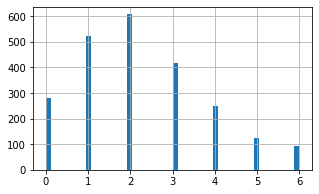

In [11]:
# % of the instances per bin
print(sng_data['ind_bins'].value_counts(sort=True, normalize=True)*100)

# Histogram over bin sizes
X_y = sng_data['ind_bins']
X_y.hist(bins=50, figsize=(5,3))
plt.show()

# Explore the data

In [18]:
# Set feature and target columns if using encoded data
features = [#'B02_mean_encoded', 'B03_mean_encoded', 'B04_mean_encoded', 'B05_mean_encoded', 'B06_mean_encoded', 
            #'B07_mean_encoded', 'B08_mean_encoded', 'B8A_mean_encoded', 'B11_mean_encoded', 'B12_mean_encoded',
            'B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_std_encoded', 'NDVI_mean_encoded', 'randNumCol_encoded', 
            'area_encoded' , 'lon_encoded', 'lat_encoded']

target = ['indicator_species']

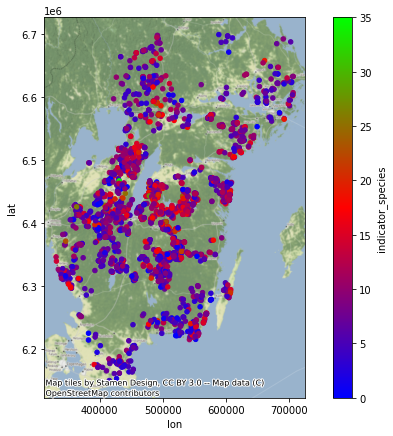

In [10]:
import matplotlib as mpl
import contextily as ctx

gdf = sng_data
df = pd.DataFrame(gdf)


# Få en figur till uppsatsen. Spridningen av betesmarker och pos_spec över studieområdet
ax = df.plot(kind="scatter", x="lon", y="lat", alpha=1,
              figsize=(10,7),
              c='indicator_species', cmap=plt.get_cmap("brg"), colorbar=True,
              sharex=False)
ctx.add_basemap(ax, crs='epsg:32633')
plt.show()

In [11]:
sng_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2293 entries, PBM-OCH to KLE-EZR
Data columns (total 77 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Date                2293 non-null   object  
 1   indicator_species   2293 non-null   int64   
 2   vascular_p          2293 non-null   int64   
 3   B02_mean            2293 non-null   float64 
 4   B03_mean            2293 non-null   float64 
 5   B04_mean            2293 non-null   float64 
 6   B05_mean            2293 non-null   float64 
 7   B06_mean            2293 non-null   float64 
 8   B07_mean            2293 non-null   float64 
 9   B08_mean            2293 non-null   float64 
 10  B8A_mean            2293 non-null   float64 
 11  B11_mean            2293 non-null   float64 
 12  B12_mean            2293 non-null   float64 
 13  B02_std             2293 non-null   float64 
 14  B03_std             2293 non-null   float64 
 15  B04_std             2293 n

In [12]:
sng_data.head()

,Date,indicator_species,vascular_p,B02_mean,B03_mean,B04_mean,B05_mean,B06_mean,B07_mean,B08_mean,B8A_mean,B11_mean,B12_mean,B02_std,B03_std,...,B03_median_encoded,B04_median_encoded,B05_median_encoded,B06_median_encoded,B07_median_encoded,B08_median_encoded,B8A_median_encoded,B11_median_encoded,B12_median_encoded,NDVI_mean_encoded,NDVI_std_encoded,randNumCol_encoded,area_encoded,lon_encoded,lat_encoded
FALTID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PBM-OCH,20190606,3,3,401.200000,579.960000,395.960000,928.142857,2294.285714,2706.285714,2716.720000,3007.571429,1948.571429,1035.285714,29.926577,62.545011,...,442.333333,327.666667,790.000000,2023.666667,2424.333333,2466.666667,2774.666667,1729.000000,850.333333,0.763515,0.027049,555.000000,2411.962066,461987.194587,6.421710e+06
654-WGU,20190606,14,23,313.054286,539.415714,360.880000,925.807910,2366.564972,2780.774011,2883.400000,3060.570621,1722.050847,860.231638,55.930645,75.779549,...,538.000000,343.000000,932.000000,2408.000000,2829.000000,2941.000000,3115.000000,1759.000000,845.000000,0.772456,0.069179,460.000000,69660.705292,543519.274658,6.217067e+06
D26-JJR,20190606,12,14,538.436195,741.491879,535.865429,1150.700000,2956.709091,3626.772727,3707.048724,4019.263636,2349.563636,1220.781818,91.232753,123.096247,...,572.666667,386.000000,961.500000,2641.666667,3201.666667,3378.000000,3580.666667,2024.166667,999.333333,0.778431,0.053690,664.333333,51928.663794,461394.359190,6.422803e+06
RAO-CEO,20190606,11,14,496.068966,713.793103,468.862069,1133.642857,3087.071429,3736.000000,3934.275862,4120.428571,2153.214286,1056.000000,107.579620,124.272886,...,568.500000,345.000000,1003.666667,2703.833333,3259.333333,3497.000000,3679.166667,1951.666667,919.500000,0.782399,0.067678,640.333333,43011.880952,490162.567825,6.418280e+06
QJW-ZHG,20190606,11,12,362.910959,579.191781,357.260274,922.432432,2569.432432,2989.621622,3251.342466,3291.729730,2025.324324,960.405405,17.364316,35.824595,...,619.500000,430.333333,1019.000000,2465.000000,2878.000000,3078.333333,3302.333333,2293.333333,1160.000000,0.800798,0.076912,618.000000,5698.467853,490424.484969,6.416459e+06


In [13]:
sng_data.describe()

,indicator_species,vascular_p,B02_mean,B03_mean,B04_mean,B05_mean,B06_mean,B07_mean,B08_mean,B8A_mean,B11_mean,B12_mean,B02_std,B03_std,B04_std,...,B03_median_encoded,B04_median_encoded,B05_median_encoded,B06_median_encoded,B07_median_encoded,B08_median_encoded,B8A_median_encoded,B11_median_encoded,B12_median_encoded,NDVI_mean_encoded,NDVI_std_encoded,randNumCol_encoded,area_encoded,lon_encoded,lat_encoded
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,...,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2.293000e+03,2293.000000,2.293000e+03
mean,8.784998,15.021369,363.248095,584.538093,422.270353,984.035064,2544.832472,3031.549687,3131.862148,3352.818653,1948.113102,984.377983,68.288735,100.241591,105.606940,...,548.853358,393.347907,947.020461,2438.041430,2901.418084,3028.120911,3230.107065,1929.005887,965.986372,0.727100,0.056699,503.783908,2.666387e+04,493748.642935,6.421499e+06
std,4.796878,8.656726,116.281818,129.824336,122.440202,193.685402,464.048965,562.177425,572.613116,598.906986,371.978072,234.373756,54.313345,47.292332,53.213983,...,96.295870,94.253958,153.797564,329.759809,390.963700,406.737031,419.625784,298.311078,188.593005,0.110956,0.023469,227.212594,5.584551e+04,74647.284345,1.096464e+05
min,0.000000,0.000000,103.578947,190.684211,110.684211,287.111111,819.805195,979.792208,971.025723,1017.571429,371.493506,165.259740,11.860298,9.957284,12.381516,...,190.500000,107.500000,275.000000,848.000000,1017.000000,1040.000000,1079.000000,423.000000,207.000000,0.024489,0.006770,1.000000,5.499511e+02,331077.948925,6.149946e+06
25%,5.000000,9.000000,280.833333,494.242424,336.641711,857.420168,2257.235294,2685.072581,2791.586207,2994.000000,1737.018868,836.219799,44.871022,74.167002,73.397483,...,484.500000,329.500000,845.250000,2230.750000,2657.500000,2789.000000,2979.000000,1743.750000,842.000000,0.705450,0.041027,343.500000,5.472494e+03,436703.692315,6.345340e+06
50%,8.000000,13.000000,342.652174,571.857143,405.944000,976.900000,2521.977778,3003.800000,3105.526718,3331.602076,1945.888889,966.432432,57.699009,93.499613,95.415790,...,546.500000,384.000000,945.500000,2437.500000,2911.000000,3040.666667,3243.000000,1929.000000,955.000000,0.755687,0.052183,502.500000,1.260292e+04,489733.835025,6.419396e+06
75%,12.000000,20.000000,421.527778,661.220000,490.364130,1101.575758,2838.840909,3380.691667,3480.545455,3718.026316,2174.859155,1111.333333,75.751237,116.025170,126.731049,...,608.166667,447.000000,1042.000000,2646.500000,3142.500000,3287.000000,3494.000000,2103.000000,1073.000000,0.790560,0.067337,667.500000,2.804347e+04,537864.197011,6.480500e+06
max,35.000000,55.000000,1318.745098,1254.372549,997.307692,1781.750000,4459.000000,5106.750000,5187.466667,5501.750000,3682.738318,2232.500000,1155.830401,665.201077,682.178414,...,947.000000,809.000000,1628.000000,3616.000000,4425.000000,4520.000000,4739.000000,3723.000000,2147.000000,0.898883,0.230018,996.000000,1.217347e+06,707310.215086,6.698529e+06


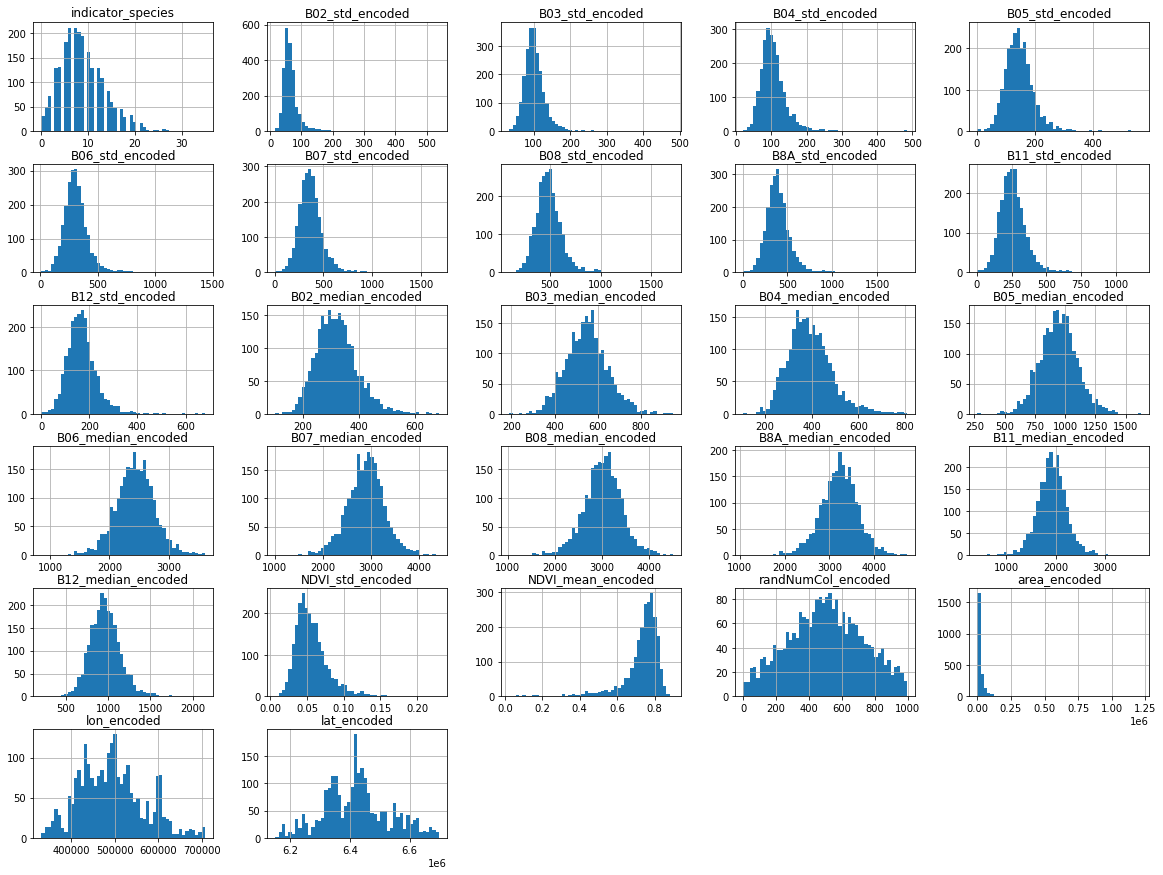

In [14]:
# Creates histograms of the target and feature values
X_y = sng_data[target + features]
X_y.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
# Visualize Pearson’s r correlations
sng_corr = sng_data[features + target]
corr_matrix = sng_corr.corr()
corr_list = corr_matrix['indicator_species'].sort_values(ascending=False)
corr_list

indicator_species     1.000000
area_encoded          0.119649
lat_encoded           0.107835
lon_encoded           0.064961
B02_std_encoded       0.030933
NDVI_std_encoded      0.029563
B08_median_encoded    0.008964
B03_std_encoded       0.008156
B07_median_encoded    0.008092
B06_median_encoded    0.007046
B8A_median_encoded    0.006252
B8A_std_encoded       0.004812
B06_std_encoded       0.003586
B07_std_encoded       0.002974
B04_std_encoded      -0.001187
B08_std_encoded      -0.002046
B02_median_encoded   -0.005042
B03_median_encoded   -0.013134
B05_median_encoded   -0.015231
B04_median_encoded   -0.017250
NDVI_mean_encoded    -0.018253
randNumCol_encoded   -0.018705
B12_median_encoded   -0.018993
B12_std_encoded      -0.019385
B11_std_encoded      -0.020261
B05_std_encoded      -0.027610
B11_median_encoded   -0.028063
Name: indicator_species, dtype: float64

### Set features as r > rndft

In [16]:
above_rnd = [x for x in corr_list if x > abs(corr_list['randNumCol_encoded'])]
below_rnd = [x for x in corr_list if x < corr_list['randNumCol_encoded']]

In [17]:
features = (list(corr_list.index[1:len(above_rnd)]))+list(corr_list.index[len(corr_list)-len(below_rnd):])
features

['area_encoded',
 'lat_encoded',
 'lon_encoded',
 'B02_std_encoded',
 'NDVI_std_encoded',
 'B12_median_encoded',
 'B12_std_encoded',
 'B11_std_encoded',
 'B05_std_encoded',
 'B11_median_encoded']

## Mutual information

In [19]:
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

# Utility functions from Tutorial
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

In [20]:
X = sng_data[features]
y = sng_data[target]

mi_scores = make_mi_scores(X, y)

c:\users\adria\desktop\masterprojektet\venv\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


lat_encoded           0.086850
lon_encoded           0.043902
area_encoded          0.037555
B08_median_encoded    0.027084
B02_std_encoded       0.024774
B05_median_encoded    0.018969
B05_std_encoded       0.014677
B12_median_encoded    0.012775
B03_median_encoded    0.011070
B02_median_encoded    0.009814
B08_std_encoded       0.008904
B04_median_encoded    0.006788
randNumCol_encoded    0.004911
B12_std_encoded       0.004636
B07_std_encoded       0.001036
B03_std_encoded       0.000425
B06_median_encoded    0.000000
B06_std_encoded       0.000000
B8A_median_encoded    0.000000
B11_median_encoded    0.000000
NDVI_std_encoded      0.000000
NDVI_mean_encoded     0.000000
B11_std_encoded       0.000000
B8A_std_encoded       0.000000
B04_std_encoded       0.000000
B07_median_encoded    0.000000
Name: MI Scores, dtype: float64


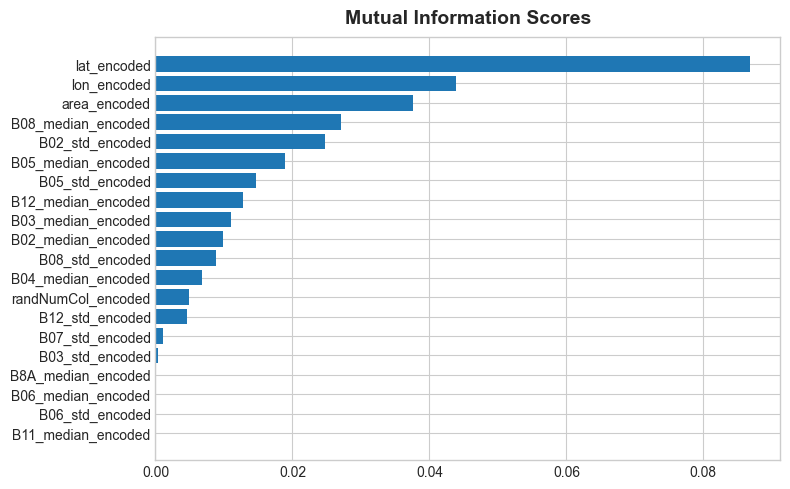

In [21]:
print(mi_scores)

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores.head(20))

### Set features with MI scores > rndft

In [26]:
x = [x for x in mi_scores if x > mi_scores['randNumCol_encoded']]
features = list(mi_scores.index[:len(x)])
features

['lat_encoded',
 'lon_encoded',
 'area_encoded',
 'B08_median_encoded',
 'B02_std_encoded',
 'B05_median_encoded',
 'B05_std_encoded',
 'B12_median_encoded',
 'B03_median_encoded',
 'B02_median_encoded',
 'B08_std_encoded',
 'B04_median_encoded']

# MACHINE LEARNING

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer
from scipy.stats import randint
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

## Setup

In [11]:
# Ignores DataConversionWarnings:
# "c:\temp\adba7123\masterprojekt\venv_pilot\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
# This is separate from the ipykernel package so we can avoid doing imports until"
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# warnings.resetwarnings()

In [12]:
# Set feature and target columns if using encoded data
features = [#'B02_mean_encoded', 'B03_mean_encoded', 'B04_mean_encoded', 'B05_mean_encoded', 'B06_mean_encoded', 
            #'B07_mean_encoded', 'B08_mean_encoded', 'B8A_mean_encoded', 'B11_mean_encoded', 'B12_mean_encoded',
            'B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_std_encoded', 'NDVI_mean_encoded', #'randNumCol_encoded', 
            'area_encoded' , 'lon_encoded', 'lat_encoded']

target = ['indicator_species']
#target = ['ind_bins']

#### Split the data, 80% for training and validating, 20% for testing

In [13]:
# Sets aside a test set
train_set, test_set = train_test_split(sng_data, test_size=0.2, random_state=0)
print('Number of instances per set')
print('Train set:', len(train_set))
print('Test set:', len(test_set))

Number of instances per set
Train set: 1834
Test set: 459


#### Set training and validation data

In [14]:
# Scale all numeric features. Makes it easier for the models to interpret
preprocessor = make_column_transformer((StandardScaler(), features))

# Set the test data
y_test = test_set[target]
X_test = test_set[features].copy()

# Training set when using cross-validation
y = train_set[target]
X = train_set[features].copy()

X_prep = preprocessor.fit_transform(X)
X_test_cv = preprocessor.transform(X_test)

# Split the data in training and validation sets 70/30
# This is for the neural networks that does not work well with cross-validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3,
                                                      random_state=0)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
X_test_nn = preprocessor.transform(X_test)

# Set binary classes

In [15]:
# The *1 changes the values from False/True to 0/1
y = (y >= 8)*1
y_test = (y_test >= 8)*1
y_valid = (y_valid >= 8)*1
y_train = (y_train >= 8)*1
print(y.value_counts())
print(y_test.value_counts())

indicator_species
1                    1025
0                     809
dtype: int64
indicator_species
1                    253
0                    206
dtype: int64


# CLASSIFICATION

## Random forest

In [16]:
rnd_clf = RandomForestClassifier(max_depth=7, max_features=None, n_estimators=400, random_state=0)
cross_val_score(rnd_clf, X, y, cv=5, scoring="accuracy")

array([0.65122616, 0.65395095, 0.65122616, 0.65122616, 0.60928962])

In [17]:
rnd_clf.fit(X, y)
y_pred = rnd_clf.predict(X_test)
print(rnd_clf.__class__.__name__, accuracy_score(y_test, y_pred))

NameError: name 'accuracy_score' is not defined

In [ ]:
rnd_clf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [300, 400, 500, 600],
    'max_features': [None, 'auto', 'log2',4,8,12],
    'max_depth' : [None,4,5,6,7,8,9]
}
rnd_grid = GridSearchCV(rnd_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
rnd_grid.fit(X, y)

#040721
#RandomForestClassifier(max_depth=8, max_features=12, n_estimators=400, random_state=0)
#{'max_depth': 8, 'max_features': 12, 'n_estimators': 400}
#0.6679203704530903


In [ ]:
rnd_clf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [320,325,330],
    'max_features': [12],
    'max_depth': [8]
}
rnd_grid = GridSearchCV(rnd_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
rnd_grid.fit(X_prep, y)

In [ ]:
cvres = rnd_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(rnd_grid.best_estimator_)
print(rnd_grid.best_params_)
print(rnd_grid.best_score_)

## Support Vector Machine

In [ ]:
svm_clf = SVC(gamma="scale", random_state=0)
cross_val_score(svm_clf, X, y, cv=5, scoring="accuracy")

In [ ]:
svm_clf = SVC(random_state=0)
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
  {'C': [0.1,1,5], 'degree': [1,2,3],'coef0': [0.1,1,5], 'gamma': ['scale', 'auto'], 'kernel': ['poly']},
 ]

svm_grid = GridSearchCV(svm_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
svm_grid.fit(X_prep, y)

In [ ]:
svm_clf = SVC(random_state=0)
param_grid = [
  {'C': [510, 515, 520], 'gamma': [0.0049, 0.005, 0.0051]},
 ]

svm_grid = GridSearchCV(svm_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
svm_grid.fit(X_prep, y)

In [ ]:
svm_clf = SVC(random_state=0)
param_grid = [
  {'C': [0.1,1,5], 'degree': [1,2,3],'coef0': [0.1,1,5], 'gamma': ['scale', 'auto'], 'kernel': ['poly']}, ]

svm_grid = GridSearchCV(svm_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
svm_grid.fit(X_prep, y)


In [ ]:
cvres = svm_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(svm_grid.best_estimator_)
print(svm_grid.best_score_)

In [ ]:
svm_grid.best_estimator_.fit(X_prep, y)
y_pred = svm_grid.best_estimator_.predict(X_test_cv)
print(svm_grid.best_estimator_.__class__.__name__, accuracy_score(y_test, y_pred))

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(random_state=0, max_iter=1000)
param_grid = {
    'C':[0.01,0.1,1,10,20],
}

log_grid = GridSearchCV(log_clf, param_grid, scoring='accuracy', return_train_score=True, verbose=3)
log_grid.fit(X_prep, y)



In [ ]:
cvres = log_grid.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

In [ ]:
print(log_grid.best_estimator_)
print(log_grid.best_params_)
print(log_grid.best_score_)

## Voting Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(C=10, max_iter=1000, random_state=0)
rnd_clf = RandomForestClassifier(max_depth=8, n_estimators=325, random_state=0)#, max_features=12
svm_clf = SVC(kernel='rbf', C=520, gamma=0.005, random_state=0, probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft',)

In [21]:
voting_clf.fit(X_prep, y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=10, max_iter=1000,
                                                 random_state=0)),
                             ('rf',
                              RandomForestClassifier(max_depth=8,
                                                     n_estimators=325,
                                                     random_state=0)),
                             ('svc',
                              SVC(C=520, gamma=0.005, probability=True,
                                  random_state=0))],
                 voting='soft')

In [22]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_prep, y)
    y_pred = clf.predict(X_test_cv)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.5969498910675382
RandomForestClassifier 0.644880174291939
SVC 0.5860566448801743
VotingClassifier 0.616557734204793


### Permutation importance

In [33]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    print(clf.__class__.__name__)
    r = permutation_importance(clf, X_prep, y,
                               n_repeats=30,
                               random_state=0)

    for i in r.importances_mean.argsort()[::-1]:
        if r.importances_mean[i] - abs(r.importances_std[i]) > 0:
            print(f"{features[i]:<20}"
                  f"{r.importances_mean[i]:.3f}"
                  f" +/- {r.importances_std[i]:.3f}")
    print()

LogisticRegression
lat_encoded         0.060 +/- 0.010
area_encoded        0.017 +/- 0.006
lon_encoded         0.015 +/- 0.008
B03_median_encoded  0.008 +/- 0.006

RandomForestClassifier
lat_encoded         0.165 +/- 0.008
lon_encoded         0.121 +/- 0.007
area_encoded        0.102 +/- 0.006
B02_std_encoded     0.033 +/- 0.003
B08_std_encoded     0.028 +/- 0.002
B02_median_encoded  0.026 +/- 0.002
B05_std_encoded     0.025 +/- 0.003
B08_median_encoded  0.024 +/- 0.002
B12_median_encoded  0.020 +/- 0.003
B04_median_encoded  0.020 +/- 0.002
B05_median_encoded  0.018 +/- 0.002
B03_median_encoded  0.016 +/- 0.002

SVC
lat_encoded         0.097 +/- 0.010
lon_encoded         0.042 +/- 0.007
area_encoded        0.039 +/- 0.005
B05_median_encoded  0.034 +/- 0.007
B03_median_encoded  0.028 +/- 0.006
B04_median_encoded  0.021 +/- 0.005
B02_median_encoded  0.021 +/- 0.005
B08_median_encoded  0.020 +/- 0.004
B08_std_encoded     0.015 +/- 0.004
B12_median_encoded  0.014 +/- 0.005
B05_std_encoded 

## Neural network

In [23]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [25]


Epoch 1/500
41/41 [==============================] - 0s 10ms/step - loss: 0.9431 - binary_accuracy: 0.4926 - val_loss: 0.6959 - val_binary_accuracy: 0.5172
Epoch 2/500
41/41 [==============================] - 0s 3ms/step - loss: 0.9254 - binary_accuracy: 0.4988 - val_loss: 0.7021 - val_binary_accuracy: 0.5064
Epoch 3/500
41/41 [==============================] - 0s 3ms/step - loss: 0.9362 - binary_accuracy: 0.5105 - val_loss: 0.7089 - val_binary_accuracy: 0.5136
Epoch 4/500
41/41 [==============================] - 0s 3ms/step - loss: 0.9068 - binary_accuracy: 0.5168 - val_loss: 0.7158 - val_binary_accuracy: 0.5045
Epoch 5/500
41/41 [==============================] - 0s 4ms/step - loss: 0.9147 - binary_accuracy: 0.4988 - val_loss: 0.7211 - val_binary_accuracy: 0.5064
Epoch 6/500
41/41 [==============================] - 0s 3ms/step - loss: 0.9228 - binary_accuracy: 0.4973 - val_loss: 0.7266 - val_binary_accuracy: 0.5027
Epoch 7/500
41/41 [==============================] - 0s 3ms/step - lo

<AxesSubplot:title={'center':'Accuracy'}>

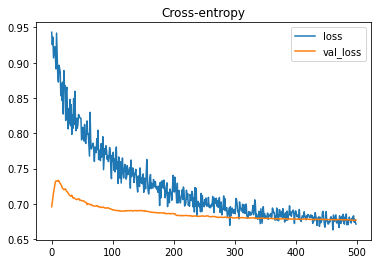

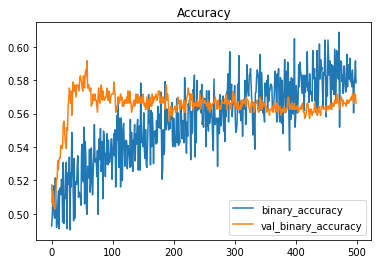

In [24]:
neurons = 50
nn_model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(neurons,activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1,activation='sigmoid')    
])

opt=tf.keras.optimizers.SGD(learning_rate=0.0005)


nn_model.compile(
    optimizer=opt,
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=100,
    min_delta=0.0001,
    restore_best_weights=True,
)
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=500,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

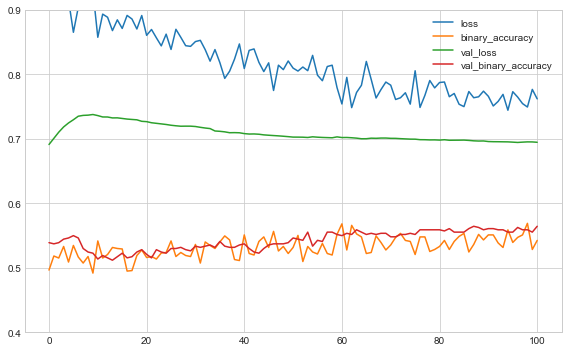

In [36]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.4, 0.9) # set the vertical range to [0-1]
plt.show()

In [36]:
nn_model.evaluate(X_test_nn, y_test)

15/15 [==============================] - 0s 1ms/step - loss: 0.6732 - binary_accuracy: 0.5926


[0.6732274293899536, 0.5925925970077515]

In [37]:
# Predicts and compare the 10 first instances
X_new = X_test_nn[:10]
y_pred = (nn_model.predict(X_new) > 0.5)*1
compare_nn = y_test[:10].copy()
compare_nn['Predicted indicator species'] = y_pred
compare_nn['Difference'] = compare_nn.iloc[:,1] - compare_nn.iloc[:,0]
compare_nn

,indicator_species,Predicted indicator species,Difference
FALTID,,,
00A-LES,0,1,1
216-GXF,1,1,0
186-TPT,0,1,1
PZF-AQK,0,1,1
FE1-NNS,1,1,0
9AE-100,1,0,-1
SMB-KSB,1,0,-1
75E-OYI,1,1,0
A46-QOI,1,1,0


### Permutation importance

In [37]:
r = permutation_importance(nn_model, X_valid, y_valid,
                           n_repeats=30,
                           random_state=0,
                           scoring='r2')
print(nn_model.__class__.__name__)
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - abs(r.importances_std[i]) > 0:
        print(f"{features[i]:<20}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

Sequential
B08_std_encoded     0.007 +/- 0.003
B03_median_encoded  0.007 +/- 0.004
B12_median_encoded  0.006 +/- 0.004


_____________

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dropout(0.3))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['binary_accuracy'])
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3, 4],
    "n_neurons": np.arange(1, 500)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)
print(rnd_search_cv.score(X_test_nn, y_test))

## Preformance measures

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
import seaborn as sns

In [26]:
models = [log_clf, rnd_clf, svm_clf, voting_clf, nn_model]

In [27]:
def y_pred_models(models):
    y_preds = []
    for model in models:
        model.fit(X_prep, y)
        y_pred = model.predict(X_test_cv)
        if model == nn_model:
            y_pred = (y_pred > 0.5)*1
        y_preds.append(y_pred)
    return y_preds

y_preds = y_pred_models(models)

58/58 [==============================] - 0s 2ms/step - loss: 0.6779 - binary_accuracy: 0.5758


In [28]:
def y_prob_scores(models):
    y_scores = []
    for model in models:
        if model != nn_model:
            y_pred_s = model.predict_proba(X_test_cv)
            y_score = y_pred_s[:, 1] 
        else:
            y_score = model.predict(X_test_cv)
        y_scores.append(y_score)
    return y_scores
    
y_scores = y_prob_scores(models)

In [29]:
for i in range(len(models)):
    print(models[i].__class__.__name__)
    print('Accuracy:\t', accuracy_score(y_test, y_preds[i]))
    print('Precision:\t', precision_score(y_test, y_preds[i]))
    print('Recall:\t', recall_score(y_test, y_preds[i]))
    print('F1:\t', f1_score(y_test, y_preds[i]))
    print('ROC AUC:\t', roc_auc_score(y_test, y_scores[i]))
    print('MCC:\t', matthews_corrcoef(y_test, y_preds[i]))
    print()

LogisticRegression
Accuracy:	 0.5969498910675382
Precision:	 0.6005917159763313
Recall:	 0.8023715415019763
F1:	 0.6869712351945854
ROC AUC:	 0.602210368778541
MCC:	 0.1659792964925735

RandomForestClassifier
Accuracy:	 0.644880174291939
Precision:	 0.6347305389221557
Recall:	 0.8379446640316206
F1:	 0.7223168654173766
ROC AUC:	 0.6413331286695576
MCC:	 0.2745309967014877

SVC
Accuracy:	 0.5860566448801743
Precision:	 0.6053511705685619
Recall:	 0.7154150197628458
F1:	 0.6557971014492753
ROC AUC:	 0.5946314133312867
MCC:	 0.14883882906939844

VotingClassifier
Accuracy:	 0.616557734204793
Precision:	 0.6066481994459834
Recall:	 0.8656126482213439
F1:	 0.7133550488599347
ROC AUC:	 0.6362293257607736
MCC:	 0.21397373964028737

Sequential
Accuracy:	 0.5708061002178649
Precision:	 0.57
Recall:	 0.9011857707509882
F1:	 0.6983154670750382
ROC AUC:	 0.5689205264975632
MCC:	 0.0984285108912497



In [30]:
for i in range(len(models)):
    print(accuracy_score(y_test, y_preds[i]))
    print(precision_score(y_test, y_preds[i]))
    print(recall_score(y_test, y_preds[i]))
    print(f1_score(y_test, y_preds[i]))
    print(roc_auc_score(y_test, y_scores[i]))
    print(matthews_corrcoef(y_test, y_preds[i]))
    print()
    print()

0.5969498910675382
0.6005917159763313
0.8023715415019763
0.6869712351945854
0.602210368778541
0.1659792964925735


0.644880174291939
0.6347305389221557
0.8379446640316206
0.7223168654173766
0.6413331286695576
0.2745309967014877


0.5860566448801743
0.6053511705685619
0.7154150197628458
0.6557971014492753
0.5946314133312867
0.14883882906939844


0.616557734204793
0.6066481994459834
0.8656126482213439
0.7133550488599347
0.6362293257607736
0.21397373964028737


0.5708061002178649
0.57
0.9011857707509882
0.6983154670750382
0.5689205264975632
0.0984285108912497




In [31]:
for i in range(len(models)):
    print(models[i].__class__.__name__)
    print(confusion_matrix(y_test, y_preds[i]))
    print()

LogisticRegression
[[ 71 135]
 [ 50 203]]

RandomForestClassifier
[[ 84 122]
 [ 41 212]]

SVC
[[ 88 118]
 [ 72 181]]

VotingClassifier
[[ 64 142]
 [ 34 219]]

Sequential
[[ 34 172]
 [ 25 228]]



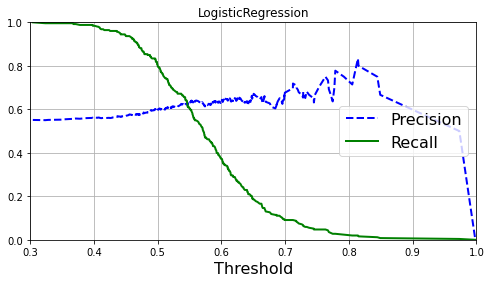

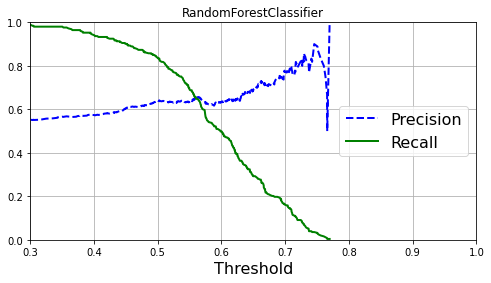

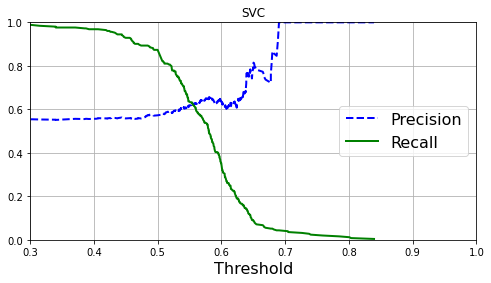

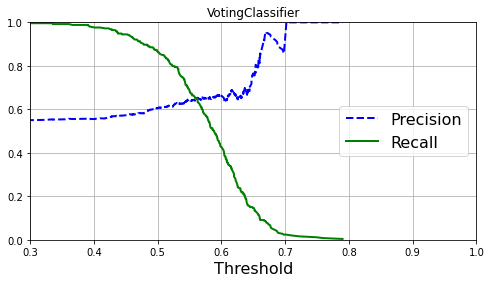

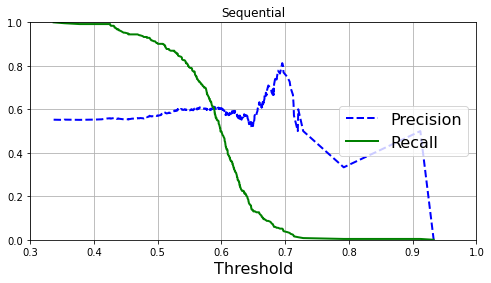

In [32]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds, model):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                              
    plt.axis([0.3, 1, 0, 1]) 
    plt.title(model.__class__.__name__)

for i in range(len(models)):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[i])
    plt.figure(figsize=(8, 4))                                                                  
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds, models[i])
    plt.show()

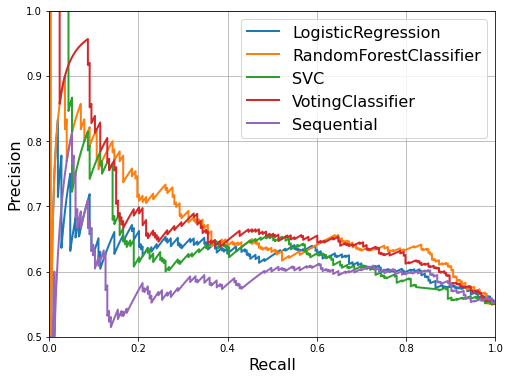

In [33]:
def plot_precision_vs_recall(precisions, recalls, label=None):
    plt.plot(recalls, precisions, linewidth=2, label=label)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0.5, 1])
    plt.grid(True)

    
plt.figure(figsize=(8, 6))

for i in range(len(models)):
    label = models[i].__class__.__name__
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[i])
    plot_precision_vs_recall(precisions, recalls, label)


plt.legend(loc="upper right", fontsize=16)
plt.show()

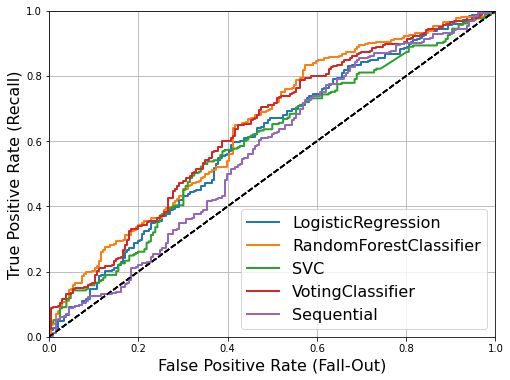

In [34]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])                                   
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            


plt.figure(figsize=(8, 6))

for i in range(len(models)):
    label = models[i].__class__.__name__
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[i])
    plot_roc_curve(fpr, tpr, label)

plt.legend(loc="lower right", fontsize=16)
plt.show()


# REGRESSION TASKS

## Random forest

In [ ]:
input_shape = X_prep.shape[1]

param_distribs = {
        'n_estimators': randint(low=150, high=400),
        'max_features': randint(low=1, high=input_shape),
    }

forest_reg = RandomForestRegressor(random_state=0)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=0)
rnd_search.fit(X_prep, y)

In [ ]:
print(rnd_search.best_estimator_)
print(rnd_search.best_params_)
sco = -rnd_search.cv_results_["mean_test_score"].max()
print(np.sqrt(sco))

In [ ]:
rf_model = rnd_search.best_estimator_
predictions = rf_model.predict(X_test_cv)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print('MSE: ', final_mse)
print('RMSE: ', final_rmse)

In [ ]:
# Predicts and compare_rf the 10 first instances
X_new = X_test_cv[:10]
y_pred = rf_model.predict(X_new)
compare_rf = y_test[:10].copy()
compare_rf['Predicted positive indicator species'] = np.around(y_pred, decimals=1)
compare_rf['Difference'] = compare_rf.iloc[:,1] - compare_rf.iloc[:,0]
compare_rf

Permutation Importance

In [ ]:
r = permutation_importance(rnd_clf, X_prep, y,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<14}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

In [ ]:
feature_importances = rnd_clf.feature_importances_
sorted(zip(feature_importances, features), reverse=True)

## Neural network

In [ ]:
# Set feature and target columns if using encoded data
features = [#'B02_mean_encoded', 'B03_mean_encoded', 'B04_mean_encoded', 'B05_mean_encoded', 'B06_mean_encoded', 
            #'B07_mean_encoded', 'B08_mean_encoded', 'B8A_mean_encoded', 'B11_mean_encoded', 'B12_mean_encoded',
            'B02_std_encoded', 'B03_std_encoded', 'B04_std_encoded', 'B05_std_encoded', 'B06_std_encoded', 
            'B07_std_encoded', 'B08_std_encoded', 'B8A_std_encoded', 'B11_std_encoded', 'B12_std_encoded',
            'B02_median_encoded', 'B03_median_encoded', 'B04_median_encoded', 'B05_median_encoded', 'B06_median_encoded', 
            'B07_median_encoded', 'B08_median_encoded', 'B8A_median_encoded', 'B11_median_encoded', 'B12_median_encoded',
            'NDVI_mean_encoded','NDVI_std_encoded',
            'area_encoded' , 'lon_encoded', 'lat_encoded']

target = ['indicator_species']
#target = ['ind_bins']

In [ ]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.0001,
    patience=50,
    restore_best_weights=True)

neurons = 25

nn_model = keras.Sequential([
    layers.Dense(neurons, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(neurons, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(neurons, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

opt = keras.optimizers.Adam(learning_rate=0.001)
nn_model.compile(
    optimizer=opt,
    loss='mse'
)
history = nn_model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

In [ ]:
# Evaluate the model
mse_test = nn_model.evaluate(X_valid, y_valid)
print('MSE:', mse_test)
print('RMSE:', np.sqrt(mse_test))

In [ ]:
predictions = nn_model.predict(X_test_nn)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print('MSE: ', final_mse)
print('RMSE: ', final_rmse)

In [ ]:
# Predicts and compare the 10 first instances
X_new = X_test_nn[:10]
y_pred = nn_model.predict(X_new)
compare_nn = y[:10].copy()
compare_nn['Predicted indicator species'] = np.around(y_pred, decimals=1)
compare_nn['Difference'] = compare_nn.iloc[:,1] - compare_nn.iloc[:,0]
compare_nn

Permutation Importance

In [ ]:
r = permutation_importance(nn_model, X_valid, y_valid,
                           n_repeats=30,
                           random_state=0,
                           scoring='r2')
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<14}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

## Getting the best hyperparameters for NN

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=input_shape):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [ ]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [ ]:
keras_reg.fit(X_train, y_train, epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
mse_test = keras_reg.score(X_valid, y_valid)

In [ ]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": list(range(1,100)),
    "learning_rate": [0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001],
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=5, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

In [ ]:
print('Best hyperparameters:', rnd_search_cv.best_params_)

In [ ]:
rnd_search_cv.best_score_

In [ ]:
rnd_search_cv.best_estimator_

In [ ]:
rnd_search_cv.score(X_valid, y_valid)

In [ ]:
model = rnd_search_cv.best_estimator_.model
model

In [ ]:
mse_model = model.evaluate(X_prep, y)
mse_model

In [ ]:
np.sqrt(mse_model)

## XTREME GRADIANT BOOSTING!

In [ ]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
xgb_model.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [ ]:
predictions = xgb_model.predict(X_test_nn)
final_mse = mean_squared_error(y_test, predictions)
final_rmse = np.sqrt(final_mse)
print('MSE: ', final_mse)
print('RMSE: ', final_rmse)

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(xgb_model, X_valid, y_valid,
                           n_repeats=30,
                           random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{features[i]:<14}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

# FIGURE CREATING FOR THE ESSAY

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=False,
                          percent=False,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy = {:0.3f}\nPrecision = {:0.3f}\nRecall = {:0.3f}\nF1 Score = {:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories,
               vmin=0, vmax=250)

    if xyplotlabels:
        plt.ylabel('Actual class')
        plt.xlabel('Predicted class' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
        
    plt.savefig('cfmatrix.png', format='png', dpi=300)

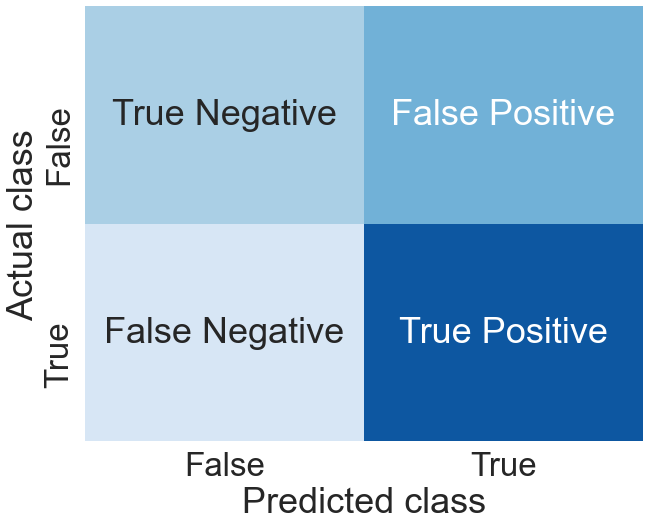

In [79]:
cf_matrix = confusion_matrix(y_test, y_preds[1])
title='Neural Network'

labels = ['True Negative','False Positive','False Negative','True Positive']
cat = [ 'False','True']
sns.set(font_scale=3)

make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      #title=title,
                      figsize=(10,8),
                      sum_stats=False,
                      cbar=False,
                      categories=cat
                      )

-----------